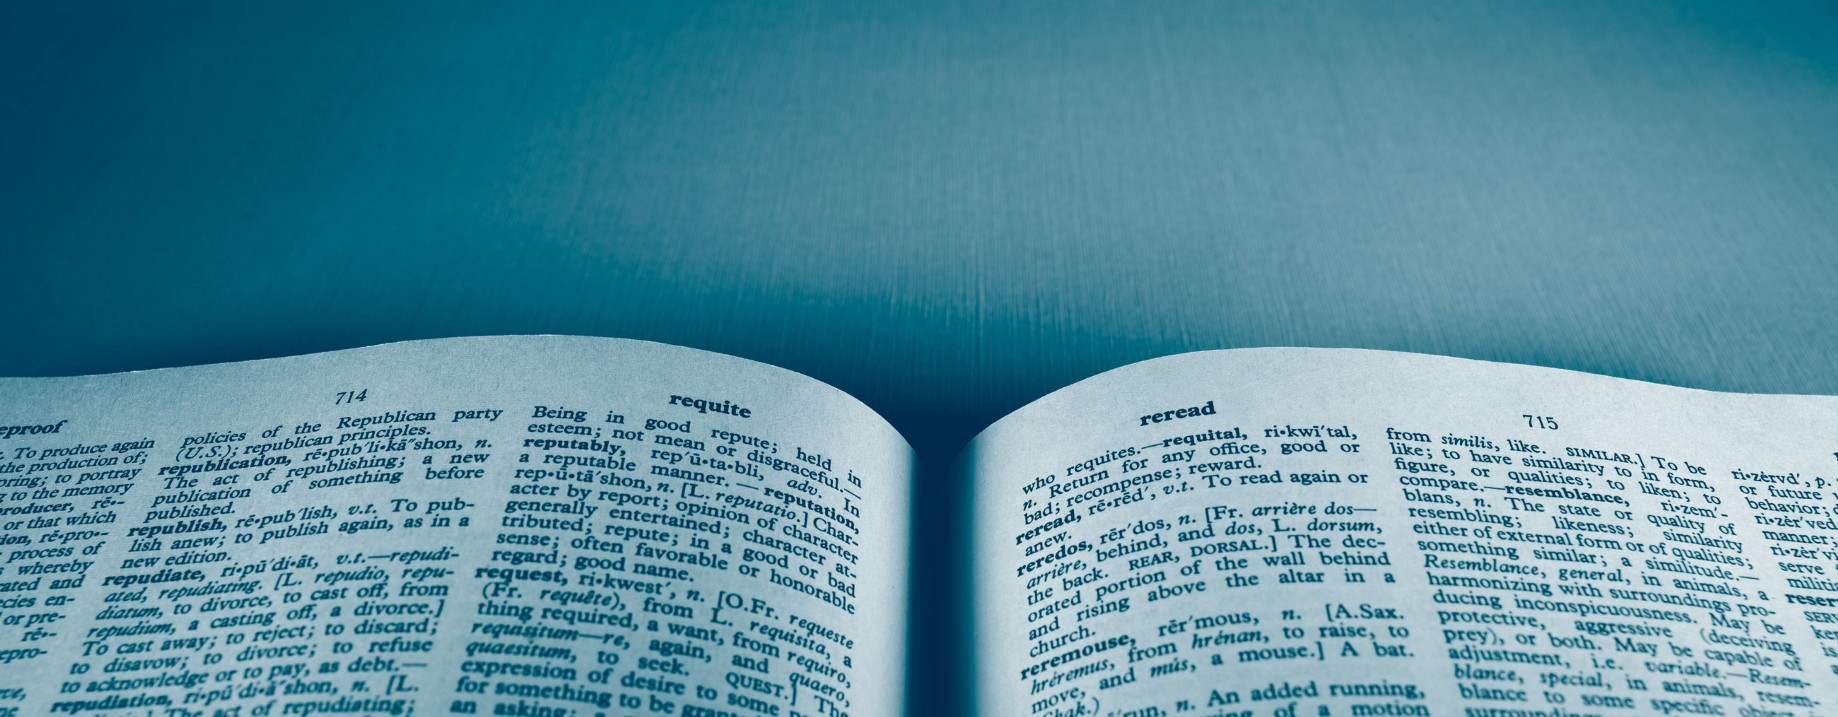


# Advanced Classification Predict

## GROUP 3 Starter Notebook - upto 1st Kaggle submission 


## Example Project below - Change and make your own 

### Might be useful. Use / learn from then discard 

# Loading Libraries
All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are the most commonly used libraries. Numpy is required for calculations like mean, median, square roots, etc. Pandas is used for data processing and data frames. We choose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

Note: You can import all the libraries that you think will be required or can import it as you go along. 

Here we are importing two libraries - numpy and pandas


In [1]:
#!pip install comet_ml
import comet_ml
from comet_ml import Experiment

In [2]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

import requests
import io



# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Drikus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drikus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Drikus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Add Python Tracking Code for Comet 

In [3]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="1DpubPFI6szNQR3Dou0CiLiDC",
    project_name="general",
    workspace="drikus-d",
)

# # Report multiple hyperparameters using a dictionary:
# hyper_params = {
#     "learning_rate": 0.5,
#     "steps": 100000,
#     "batch_size": 50,
# }
# experiment.log_parameters(hyper_params)

# # Or report single hyperparameters:
# hidden_layer_size = 50
# experiment.log_parameter("hidden_layer_size", hidden_layer_size)

# # Long any time-series metrics:
# train_accuracy = 3.14
# experiment.log_metric("accuracy", train_accuracy, step=0)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/drikus-d/general/07aae4b81c3d4340a969a0ebe1817109



# Loading Dataset
Pandas module is used for reading files.

You can learn more about pandas [here](https://dphi.tech/learn/introduction-to-pandas)

In [4]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.

url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/train.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

train_data = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

print (train_data.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


## What do you need to do now?
*  Perform EDA and Data Visualization, to understand the data. Learn more about EDA [here](https://dphi.tech/learn/introduction-to-exploratory-data-analysis). Learn more about data visualization [here](https://dphi.tech/learn/introduction-to-data-visualization)
*  Clean the data if required (like removing or filling missing values, treat outliers, etc.). Learn more about handling missing values [here](https://youtu.be/EaGbS7eWSs0)
*  Perform Data Preprocessing if you feel it's required. Learn one hot encoding [here](https://youtu.be/9yl6-HEY7_s).

## Basic EDA

In [5]:
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [7]:
train_data['tweet'] = train_data['message'].str.lower()


def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', str(text))
    return text

train_data['tweet'] = train_data['tweet'].apply(remove_special_characters, remove_digits=False)

def f(r):
    wnl = WordNetLemmatizer()
    words = nltk.word_tokenize(r)
    lemmatized_words = [wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    return " ".join(lemmatized_words)

train_data['tweet'] = train_data['tweet'].apply(f)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_X = cv.fit_transform(train_data['tweet']).toarray()
data_X = pd.DataFrame(data_X, columns=cv.get_feature_names())

# Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables.
By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [9]:
X = data_X
y = train_data['sentiment']

# Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.



In [10]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [11]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

# Building Model
Now we are finally ready, and we can train the model.

There are tons of Machine Learning models like Logistic Regression, Random Forest, Decision Tree, etc. to say you some. However here we are using Logistic Regression (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [12]:
# Importing LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

### Train the model

In [14]:
lr.fit(X_train, y_train)

LogisticRegression()

# Validate The Model
Wonder🤔 how well your model learned! Lets check it.

### Predict on the validation data (X_val)
Now we predict using our trained model on the validation set we created i.e. X_val and evaluate our model on unforeseen data.

In [15]:
pred = lr.predict(X_val)

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Accuracy Score, F1 Score, Precision, Recall etc. However, **Accuracy Score** is the metric for this challenge. 

In [16]:
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score

In [17]:
print('F1 Score is: ', f1_score(y_val, pred, average='weighted')) 

# y_val is the original target value of the validation set (X_val)
# pred is the predicted target value of the validation set

F1 Score is:  0.7272038431867857


# Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. testing_set_label.csv) given in 'Data' section of the problem page.



## Load Test Set
Load the test data on which final submission is to be made.

In [18]:
url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/test_with_no_labels.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

test_data = pd.read_csv(io.StringIO(download.decode('utf-8')))
test_data_copy = test_data

# Printing out the first 5 rows of the dataframe

print (test_data.head())


                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


**Note:** 
*  Use the same techniques to deal with missing values as done with the training dataset.   

*  **Don't remove any observation/record from the test dataset otherwise you will get wrong answer. The number of items in your prediction should be same as the number of records are present in the test dataset**.

*  Use the same techniques to preprocess the data as done with training dataset.

***Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and validation data?***

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the rmse of the model will increase. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a ValueError saying something like 'number of features given x; expecting n'. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.



In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [20]:
test_data['tweet'] = test_data['message'].str.lower()


def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', str(text))
    return text

test_data['tweet'] = test_data['tweet'].apply(remove_special_characters, remove_digits=False)

def f(r):
    wnl = WordNetLemmatizer()
    words = nltk.word_tokenize(r)
    lemmatized_words = [wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    return " ".join(lemmatized_words)

test_data['tweet'] = test_data['tweet'].apply(f)



In [21]:
test = cv.transform(test_data['tweet']).toarray()
test_data = pd.DataFrame(test, columns=cv.get_feature_names())

## Make Prediction on Test Dataset
Time to make submission!!!

In [22]:
target = lr.predict(test_data)

#### Note: **Follow the submission guidelines given in 'How To Submit' Section.**

## How to save prediciton results locally via jupyter notebook?
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results.csv' will be created in your current working directory.

In [23]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# print(res.info())
# print(test_data_copy.info())

data = [test_data_copy["tweetid"], res["prediction"]]

headers = ["tweetid","sentiment"]

res_output = pd.concat(data, axis=1, keys=headers)

res_output.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

#print(res_output.info())

# **OR**, 
**if you are working on Google Colab then use the below set of code to save prediction results locally**

## How to save prediction results locally via colab notebook?
If you are working on Google Colab Notebook, execute below block of codes. A file named 'prediction_results' will be downloaded in your system.

In [141]:
# # To create Dataframe of predicted value with particular respective index
# res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
# res.columns = ["prediction"]

# # To download the csv file locally
# from google.colab import files
# res.to_csv('submission.csv', index = False)         
# files.download('submission.csv')